# Predicting Customer Churn to Increase Retention

***

## Table of Contents 

1. Dataset
<br>1.1 Data Overview
<br>1.2 Feature Overview
2. Data Cleaning
3. Exploratory Data Analysis
<br>3.1 Summary Statistics of Numerical Features
<br>3.2 Visualizing Churn (target variable)
<br>3.3 Scatterplot of Churn by MonthlyCharges and tenure
<br>3.4 Cluster 1
<br>3.5 Cluster 2
<br>3.6 Cluster 3
<br>3.7 Distribution of Numerical Features
<br>3.8 Churn Count per Categorical Feature
***

## Introduction 

Acquiring a new customer can be five times more expensive than retaining an existing one! Such a staggering proportion emphasizes the importance of catering to an existing customer’s satisfaction and longevity to generate sales at a high ROI. In fact, increasing customer retention rates by as little as 5% can increase profits by 25 to 95%, according to a study done by Frederick Reichheld of Bain & Company. A key metric in evaluating customer retention is the customer churn rate.

In the telecommunications industry, the churn rate measures the percentage of service subscribers who discontinue their subscriptions over a particular period. Many providers in the industry offer similar services and generate the bulk of their revenue through subscription costs; therefore, the churn rate is a key metric to minimize to sustain subscription revenues.

The varying Internet, television, and telephone service providers available to the public make it easy and desirable for customers to try different services to see which works best for them. Some providers do not even require customers to lock into long-term contracts and give them the flexibility to change providers frequently. Service providers are able to provide more value to customers via short-term contracts by retaining their existing customers and minimizing their churn. 


## 1. Dataset

### 1.1 Data Overview

The dataset used in this project is available on Kaggle, [here.](https://www.kaggle.com/blastchar/telco-customer-churn)

Each row represents a customer and each column contains customers' attributes.
<br>**The dataset includes information about:**
* Demographic info about customers – gender, age, and if they have partners and dependents
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – tenure, contract, payment method, paperless billing, monthly charges, and total charges
* Customers who left within the last month - the column is called Churn

### 1.2 Feature Overview

In [1]:
%%html
<style>
    table {
        display: inline-block
    }
</style>

**A. Demographics**

| feature_name  | data_type   | description                    | values             |
| ------------- | ----------- | ------------------------------ | ------------------ |
| gender        | categorical | sex                            | "Male" , "Female"  |
| SeniorCitizen | categorical | is senior citizen              | "Yes", "No"        |
| Partner       | categorical | customer has a partner         | "Yes", "No"        |
| Dependents    | categorical | customer has dependents        | "Yes", "No"        |

**B. Services**

| feature_name      | data_type   | description                    | values                     |
| ----------------- | ----------- | ------------------------------ | -------------------------- |
| PhoneService      | categorical | has phone service              | "Yes", "No"                |
| MultipleLines     | categorical | has multiple phone lines       | "Yes", "No"                |
| InternetService   | categorical | type of Internet service       | "DSL", "Fiber optic", "No" |
| OnlineSecurity    | categorical | has malware protection         | "Yes", "No"                |
| OnlineBackup      | categorical | has digital backup service     | "Yes", "No"                |
| DeviceProtection  | categorical | has device protection plan     | "Yes", "No"                |
| TechSupport       | categorical | has tech support               | "Yes", "No"                |
| StreamingTV       | categorical | has TV streaming service       | "Yes", "No"                |
| StreamingMovies   | categorical | has movie streaming service    | "Yes", "No"                |

**C. Account Information**

| feature_name      | data_type           | description                            | values                          |
| ----------------- | ------------------- | -------------------------------------- | ------------------------------- |
| customerID        | categorical         | customer identification number         |                                 |
| tenure            | numerical (ordinal) | # of months with company               |                                 |
| Contract          | categorical         | contractual term                       | "Monthly", "Annual", "Biannual" |
| PaperlessBilling  | categorical         | billed via email                       | "Yes", "No"                     |
| PaymentMethod     | categorical         | method of payment on file              | "Electronic Check", "Mailed Check", "Bank transfer (automatic)", "Credit card (automatic)"    |
| MonthlyCharges    | numerical (cardinal)| amount charged to the customer monthly |                         |
| TotalCharges      | numerical (cardinal)| total amount charged to the customer   |                         |

**D. Target Variable**

| feature_name      | data_type         | description                    | values                          |
| ----------------- | ----------------- | ------------------------------ | ------------------------------- |
| Churn             | categorical       | left within the last month     | "Yes", "No"                     |

***

## 2. Data Cleaning

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [3]:
#Load dataset
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv', index_col='customerID')

In [4]:
df.shape

(7043, 20)

In [5]:
# Identify feature data types and data set shape. 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


In [6]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

The TotalCharges feature is encoded as an object data type with strings as values. Since the Series contains string values, it may contain null values that are encoded as strings, such as blank spaces or dashes. After checking for these null values, and imputing or dropping them, we must convert the Series to float64 data type.

In [7]:
# Identify number of missing (null) values in the data set.
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

At first glance, all features appear to have non-null entries; however, there may still be missing values encoded in different ways. Let's take a quick glance at the first 5 records to get a feel for the data.

In [8]:
# Display first 5 records 
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
# Replace 0 and 1 with "No" and "Yes" in SeniorCitizen feature, repectively, to keep values consistent. 
# (we will encode categorical features later during preprocessing, not during data preparation)

df.SeniorCitizen = df.SeniorCitizen.replace({1:'Yes', 0:'No'})

In [10]:
# Replace any whitespace values with NaN
df = df.replace(r'\s+$', np.nan, regex=True)

# Print number of null values 
print(df.isnull().sum())

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


The TotalCharges column contains 11 missing/null values. These records containing null values only comprise 0.16% of the total data and will be dropped.

In [11]:
# Drop missing values
df = df.dropna()

# After dropping the missing values from the TotalCharges column, convert it from string to float. 
df.TotalCharges = df.TotalCharges.astype(float)

In [12]:
# Display unique values for each feature.
for col in df:
    print(col)
    print(df[col].unique(), '\n')

gender
['Female' 'Male'] 

SeniorCitizen
['No' 'Yes'] 

Partner
['Yes' 'No'] 

Dependents
['No' 'Yes'] 

tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] 

PhoneService
['No' 'Yes'] 

MultipleLines
['No phone service' 'No' 'Yes'] 

InternetService
['DSL' 'Fiber optic' 'No'] 

OnlineSecurity
['No' 'Yes' 'No internet service'] 

OnlineBackup
['Yes' 'No' 'No internet service'] 

DeviceProtection
['No' 'Yes' 'No internet service'] 

TechSupport
['No' 'Yes' 'No internet service'] 

StreamingTV
['No' 'Yes' 'No internet service'] 

StreamingMovies
['No' 'Yes' 'No internet service'] 

Contract
['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling
['Yes' 'No'] 

PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.

* For the features relating to Services, we replace the "No internet service" value to "No" to eliminate redundancy: the InternetService feature let's us know whether or not the customer had Internet services. 
* We must also replace the "No phone service" value in the MultipleLines feature with "No" to eliminate redunancy: the PhoneService feature let's us know whether or not the customer had phone services.
* For the Contract feature, let's replace the following for simplicity:
    * "Month-to-month" with "Monthly"
    * "One year" with "Annual"
    * "Two year" with "Biannual"

In [13]:
# Replace "No internet service" with "No"
internet_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for x in internet_cols:
    df[x] = df[x].replace({'No internet service' : 'No'})

# Replace "No phone service" with "No"
df.MultipleLines = df.MultipleLines.replace({'No phone service' : 'No'})

# Contract feature changes
df.Contract = df.Contract.replace({
    'Month-to-month' : 'Monthly',
    'One year' : "Annual",
    'Two year' : 'Biannual'
})

In [14]:
# View all changes made up to this point on the first 5 records
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Monthly,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,Annual,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Monthly,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,Annual,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Monthly,Yes,Electronic check,70.70,151.65,Yes


***

## 3. Exploratory Data Analysis

### 3.1 Summary Statistics of Numerical Ffeatures

In [99]:
# View summary statistics of numercial features
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


### 3.2 Visualizing Churn (target variable)

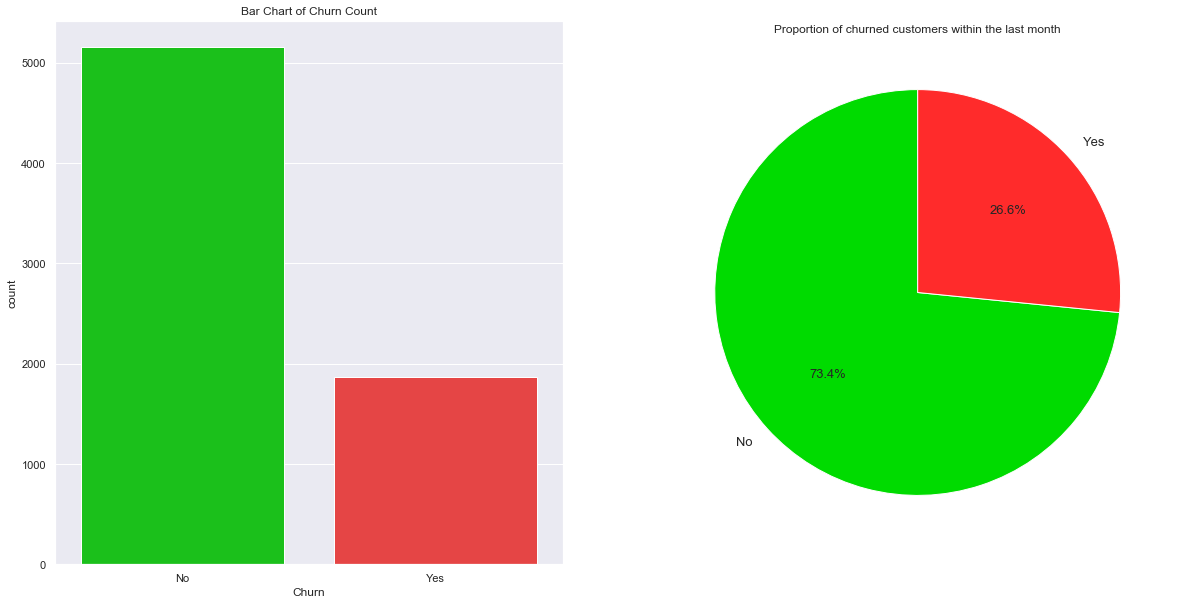

In [78]:
# Colors
lightgreen = '#00db00'
red = '#ff2b2b'

# Count (bar) plot
plt.figure(figsize=(20, 10));
plt.subplot(121);
sns.countplot(x='Churn', palette=[lightgreen, red], data=df);
plt.title('Bar Chart of Churn Count');

# Pie chart
plt.subplot(122);
labels = ['No', 'Yes']
colors = [lightgreen, red]
sizes = df.groupby('Churn').size()

# Draw pie chart
patches, texts, autotexts = plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90);

# Increase font size for labels
for text in texts:
    text.set_size(13)

# Increase font size for percentages
for autotext in autotexts:
    autotext.set_size(13)

plt.title('Proportion of churned customers within the last month');
plt.show()

The churn rate in our dataset is imbalanced: about 30% of customers discontinued their subscriptions (churned) whereas 70% did not. The churn rate is expected to be imbalanced in the telecom industry and is therefore acceptable to analyze, visualize, and model on with our given samples.

### 3.3 Scatterplot of Churn by MonthlyCharges and tenure

As a quick recap, we only have 3 numeric features in the dataset: TotalCharges, MonthlyCharges, and tenure. 

A customer's total charges are **dependent** on monthly charges and tenure. As monthly charges increase, so will the total charges; similarly, as the customer's tenure with the company increases, so does the total charges incurred over the given period.

A customer's monthly charges, however, is **independent** of tenure since it doesn't effect the growth or change of the other. In the telecom industry, the churn rate is typically measured monthly since providers price their services on a monthly basis and experience faster churn rates. Monthly charges are therefore an essential feature to analyze when evaluating churn. Let's analyze clusters of churn between MonthlyCharges and tenure to uncover some hidden insights.

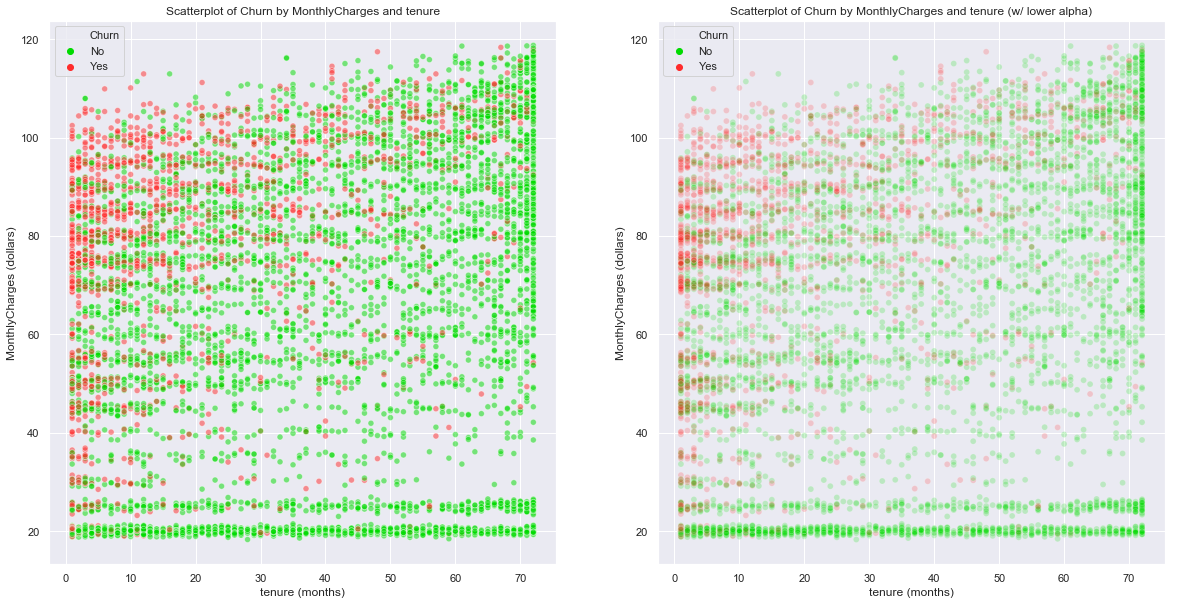

In [16]:
# Draw figure to render subsequent plots
plt.figure(figsize=(20, 10));

# Scatterplot of Churn by MonthlyCharges and tenure
plt.subplot(121);
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', palette=[lightgreen, red], alpha=0.50, data=df);
plt.xlabel('tenure (months)');
plt.ylabel('MonthlyCharges (dollars)');
plt.title('Scatterplot of Churn by MonthlyCharges and tenure');

# Display same scatterplot using lower alpha value
plt.subplot(122);
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', palette=[lightgreen, red], alpha=0.20, data=df);
plt.xlabel('tenure (months)');
plt.ylabel('MonthlyCharges (dollars)');
plt.title('Scatterplot of Churn by MonthlyCharges and tenure (w/ lower alpha)');

# Display plots
plt.show()

The scatterplots above visualize the same information: churn by monthly charges and tenure. The data points in the plot to the right, however, are rendered with more transparency to accentuate clusters (of consumer behavior). 


The scatterplots above convey the following insights:
* **Cluster 1:** Customer that pay less than \$35/month (lower quartile of MonthlyCharges) tend to not churn and maintain up to 70 months of tenure.
* **Cluster 2:** Customers that pay more than \$70/month (upper 50th percentile of MonthlyCharges) with less than 10 months of tenure tend to churn.
* **Cluster 3:** Customer with more than 60 months of tenure tend to incur the highest monthly charges and not churn.

### 3.4 Cluster 1
Customer that pay less than $35/month tend to not churn and maintain up to 70 months of tenure.

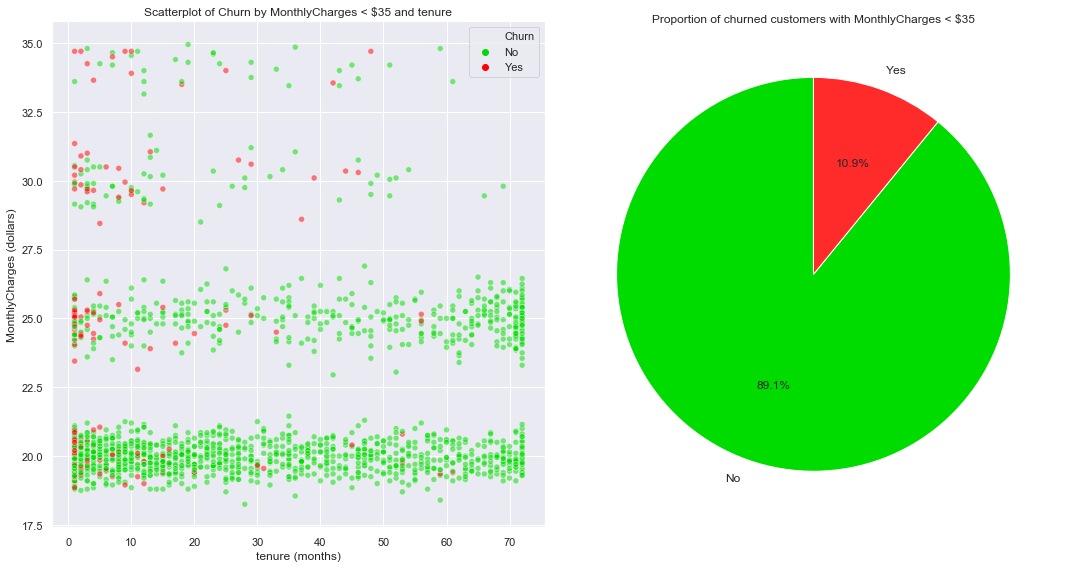

In [104]:
# Dataframe of MonthlyCharges less than $35
df_cluster1 = df[df.MonthlyCharges < 35]

# Draw figure to render subsequent plots
plt.figure(figsize=(15, 8));

# Scatterplot of records with MonthlyCharges less than $35
plt.subplot(121);
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', palette=[lightgreen, 'red'], alpha=0.5, data=df_cluster1);
plt.xlabel('tenure (months)');
plt.ylabel('MonthlyCharges (dollars)');
plt.title('Scatterplot of Churn by MonthlyCharges < $35 and tenure');

# Pie chart of records with MonthlyCharges less than $35
plt.subplot(122);
labels = ['No', 'Yes']
colors = [lightgreen, red]
df_LowMonthlyCharges = df_cluster1.groupby('Churn').size()

# Draw pie chart
patches1, texts1, autotexts1 = plt.pie(df_LowMonthlyCharges, 
                                    colors = colors, 
                                    labels=labels, 
                                    autopct='%1.1f%%', 
                                    startangle=90);

# Increase font size for labels
for text in texts1:
    text.set_size(12)

# Increase font size for percentages
for autotext in autotexts1:
    autotext.set_size(12)

# Display plot
plt.title('Proportion of churned customers with MonthlyCharges < $35');
plt.tight_layout()
plt.show()

The scatterplot and pie chart above tell us that our telecomm company retained about 90% of customers who's monthly charges were less than \$35/month. The scatterplot above also shows two distinct bands or clusters of customers at \\$20/month and \\$25/month. 
* At \\$20/month, the company consistently retained many customers for up to 70 months.
* At \\$25/month, the amount of retained customers increases as tenure increases. At 60+ months of tenure, there is another cluster of customers.

### 3.5 Cluster 2
Customers that pay more than $70/month with less than 10 months of tenure tend to churn.

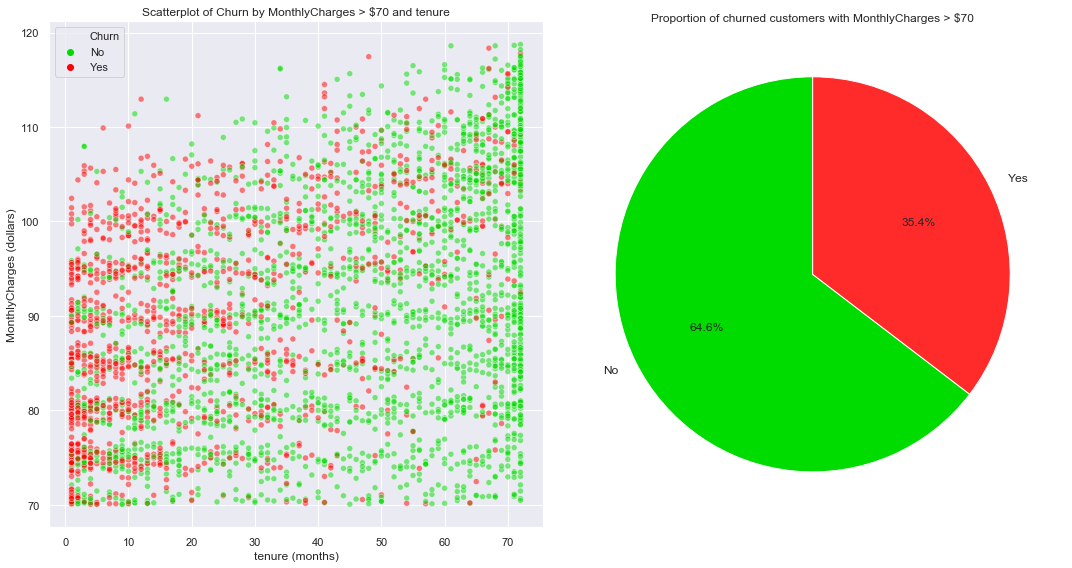

In [133]:
# Dataframe of MonthlyCharges > $70
df_cluster2 = df[df.MonthlyCharges > 70]

# Draw figure to render subsequent plots
plt.figure(figsize=(15, 8));

# Scatterplot of records with MonthlyCharges more than $70
plt.subplot(121);
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', hue_order=['No', 'Yes'], 
                palette=[lightgreen, 'red'], alpha=0.50, data=df_cluster2);
plt.xlabel('tenure (months)');
plt.ylabel('MonthlyCharges (dollars)');
plt.title('Scatterplot of Churn by MonthlyCharges > $70 and tenure');

# Pie chart of records with MonthlyCharges more than $70
plt.subplot(122);
labels = ['No', 'Yes']
colors = [lightgreen, red]
df_HighMonthlyCharges = df_cluster2.groupby('Churn').size()

# Draw pie chart
patches2, texts2, autotexts2 = plt.pie(df_HighMonthlyCharges, 
                                    colors = colors, 
                                    labels=labels, 
                                    autopct='%1.1f%%', 
                                    startangle=90);

# Increase font size for labels
for text in texts2:
    text.set_size(12)

# Increase font size for percentages
for autotext in autotexts2:
    autotext.set_size(12)

# Display plot
plt.title('Proportion of churned customers with MonthlyCharges > $70');
plt.tight_layout()
plt.show()

### 3.6 Cluster 3

### 3.7 Distribution of Numerical Features

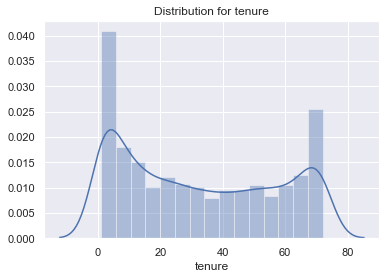

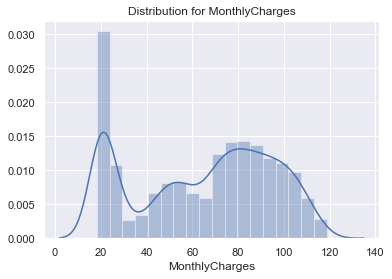

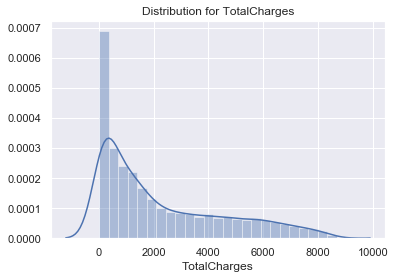

In [29]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

def numerical_col(col):
    sns.distplot(df[col]);
    plt.title('Distribution for ' + col);
    plt.show()
    
for col in num_cols:
    numerical_col(col)

The distributions of the numerical features appear to **not** be normal. We will need to normalize and standardize them to make further statistical inferences on them.

### 3.8 Churn Count per Categorical Feature

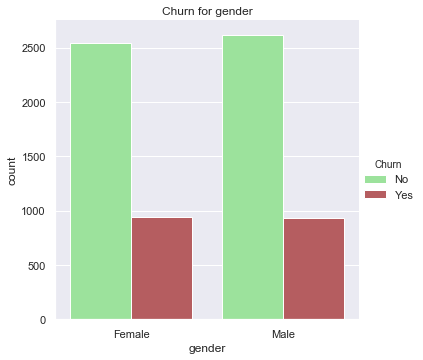

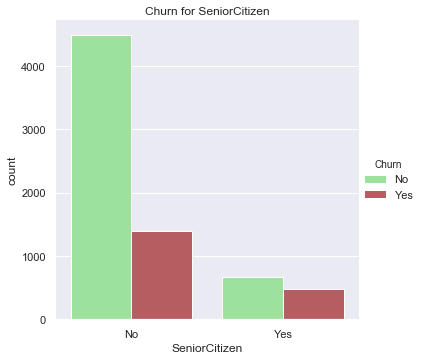

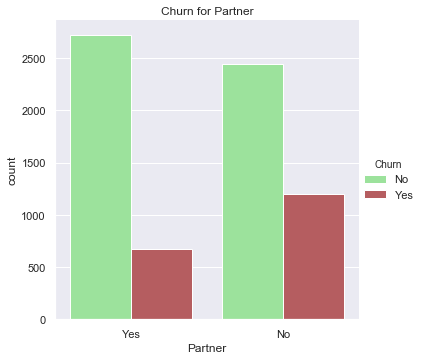

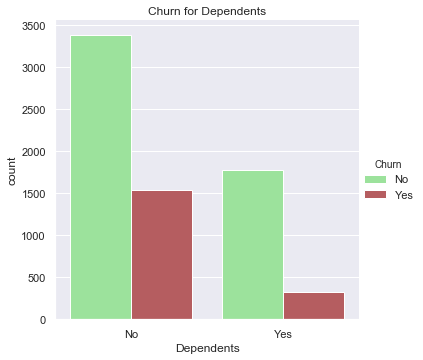

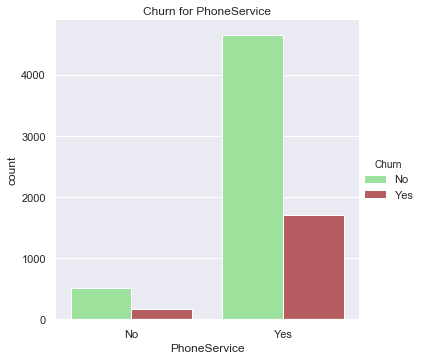

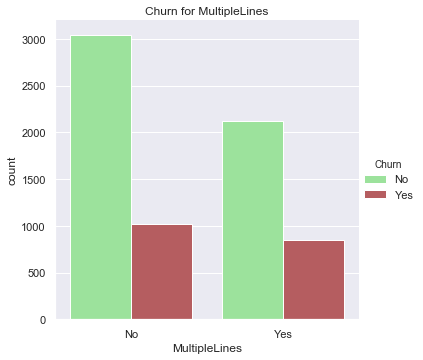

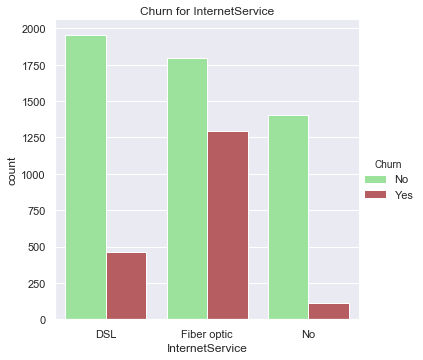

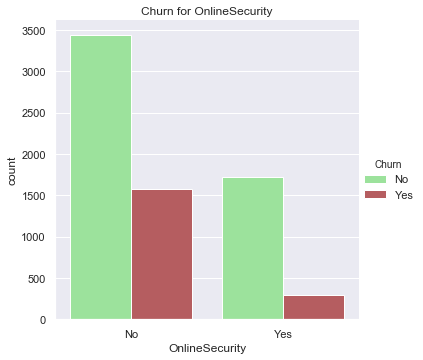

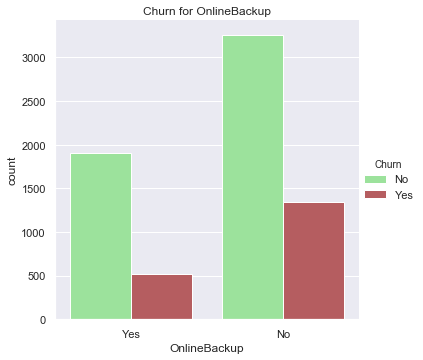

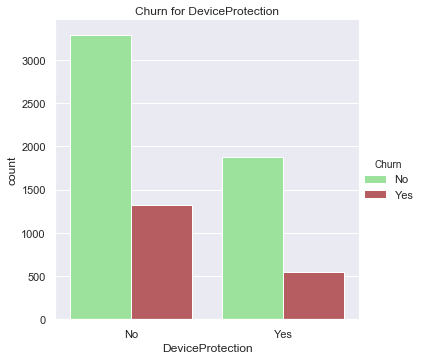

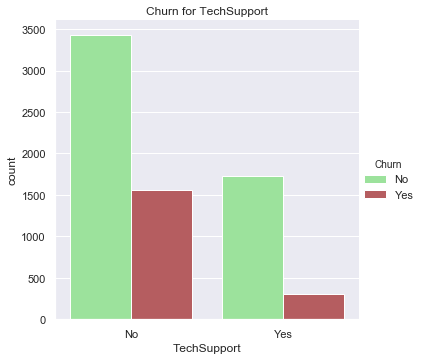

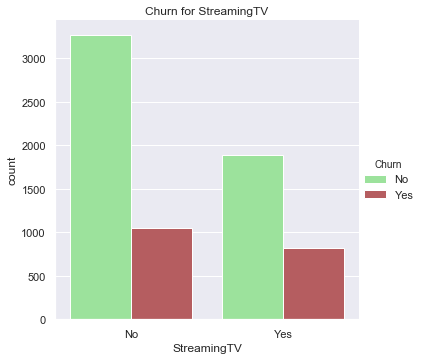

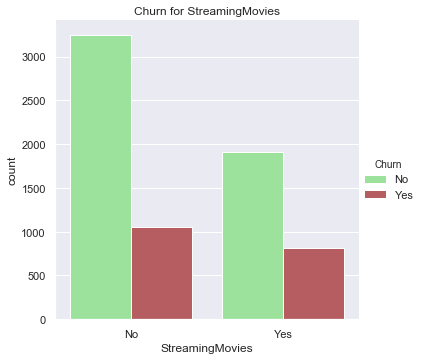

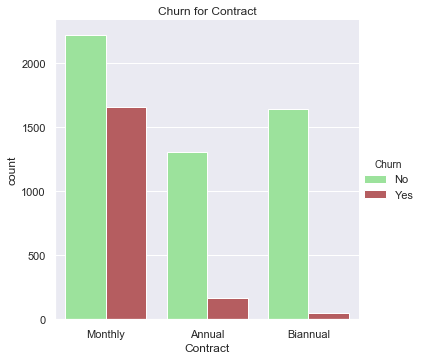

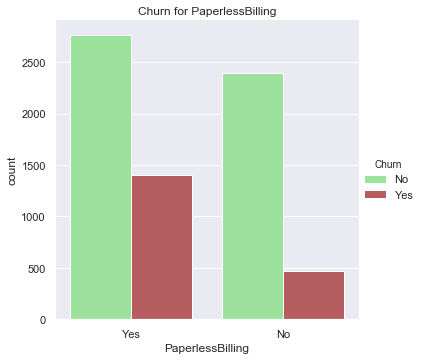

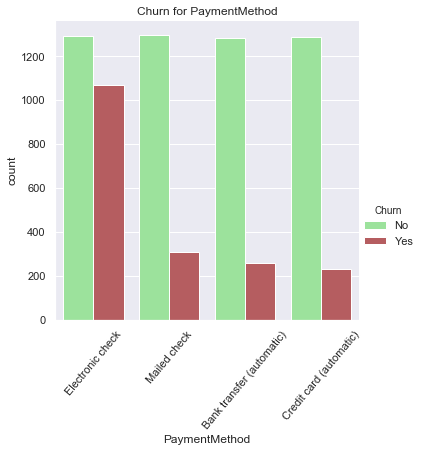

In [21]:
# Categorical columns (omit Churn - see 3.1 above for Churn count visualization)
cat_cols = [
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod'
]

def categorical_churn(col):
    sns.catplot(x=col, hue='Churn', kind='count', palette=['lightgreen','r'], data=df);
    plt.title("Churn for " + col)
    if col == 'PaymentMethod':
        plt.xticks(rotation=50);
    
for col in cat_cols:
    categorical_churn(col)

***

Let's plot the 3 non-binary categorical features against the numerical features.
* InternetService: DSL, Fiber optic, No
* Contract: Monthly, Annual, Biannual
* PaymentMethod: Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)

### InternetService by tenure and Churn

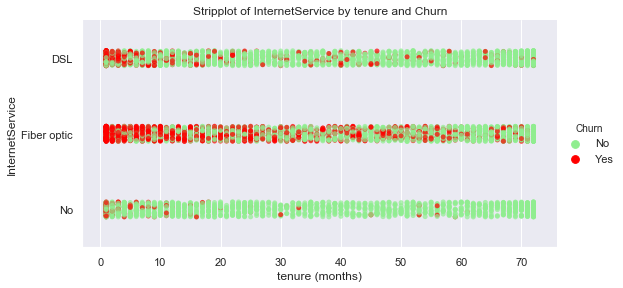

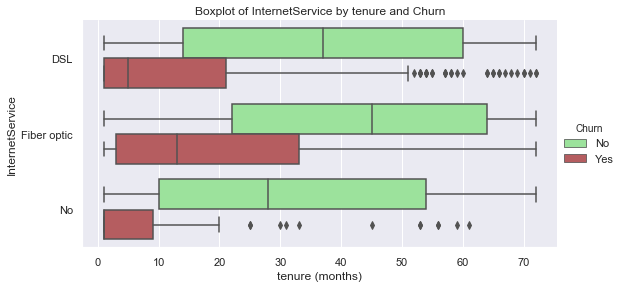

In [22]:
# Stripplot of InternetService by tenure and Churn
sns.catplot(x='tenure', y='InternetService', hue='Churn', kind='strip', palette=['lightgreen', 'red'], alpha=0.7, height=4, aspect=2, data=df);
plt.title('Stripplot of InternetService by tenure and Churn');
plt.xlabel('tenure (months)');

# Boxplot of InternetService by tenure and Churn
sns.catplot(x='tenure', y='InternetService', hue='Churn', kind='box', palette=['lightgreen', 'r'], height=4, aspect=2, data=df);
plt.title('Boxplot of InternetService by tenure and Churn');
plt.xlabel('tenure (months)');

Customers with high total charges and less than 40 months of tenure terminated their services with the company.

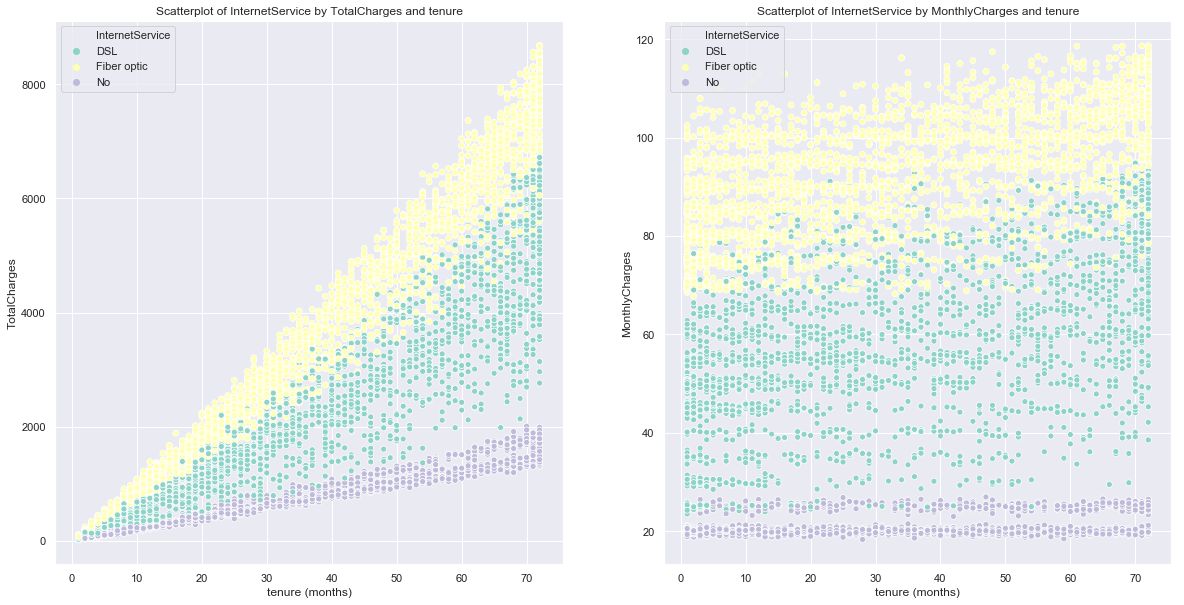

In [23]:
# Scatterplot of InternetService by TotalCharges and tenure
plt.figure(figsize=(20, 10));
plt.subplot(121);
sns.scatterplot(x='tenure', y='TotalCharges', hue='InternetService', palette='Set3', data=df);
plt.xlabel('tenure (months)');
plt.title('Scatterplot of InternetService by TotalCharges and tenure');

# Scatterplot of InternetService by MonthlyCharges and tenure
plt.subplot(122);
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='InternetService', palette='Set3', data=df);
plt.xlabel('tenure (months)');
plt.title('Scatterplot of InternetService by MonthlyCharges and tenure');

plt.show()

## Scatterplot of numeric features
### No categorical features depicted in this plot

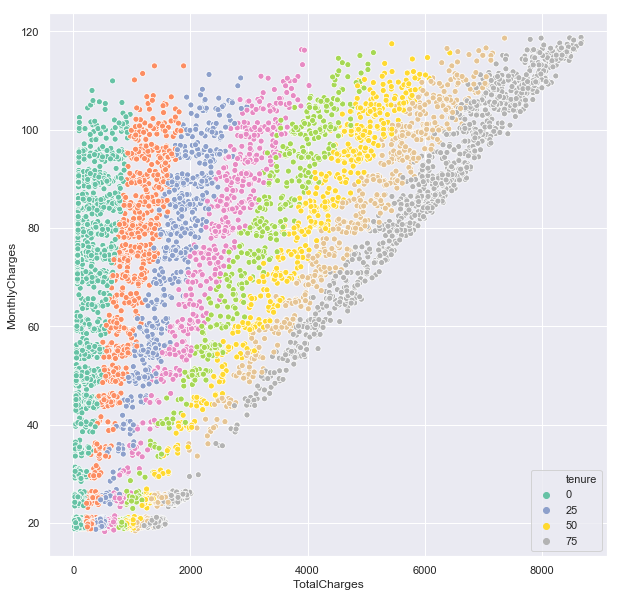

In [24]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='TotalCharges', y='MonthlyCharges', hue='tenure', palette='Set2', data=df);

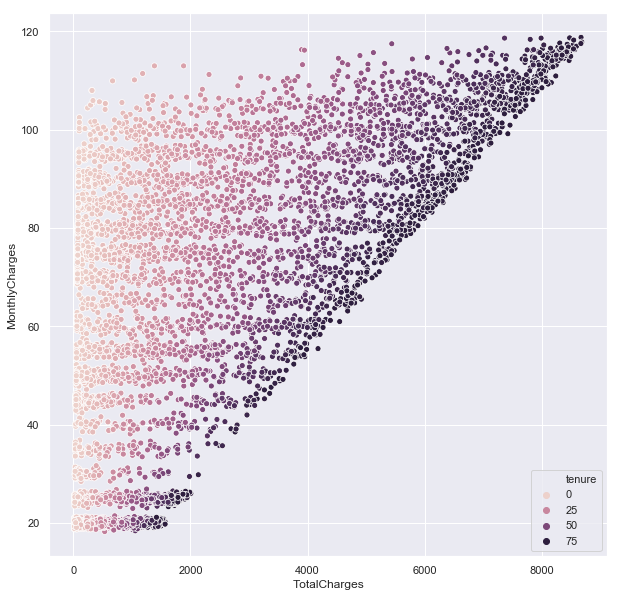

In [25]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='TotalCharges', y='MonthlyCharges', hue='tenure', data=df);

In [26]:
# Features organized by customer information

# Demographic features
demo_cols = [
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents'
]

# Services features
services_cols = [
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

# Account information features
account_cols = [
    'customerID',
    'tenure',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod',
    'MonthlyCharges',
    'TotalCharges'
]

# Target variable
target = 'Churn'

In [27]:
# Numerical columns
num_cols = [
    'tenure',
    'MonthlyCharges',
    'TotalCharges'
]

In [28]:
# plt.figure(figsize=(12,12), dpi=80)
# sns.heatmap(df_cat_encoded.corr(), xticklabels=df_cat_encoded.corr().columns, yticklabels=df_cat_encoded.corr().columns, center=0, annot=True);

# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.show()